# Lista 06 - Gradiente Descendente e Regressão Multivariada

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from numpy.testing import *

plt.ion()

Hoje vamos fazer um gradiente descendente para uma regressão linear com múltiplas variáveis.

Para isso, utilizaremos a base de dados carros, ``hybrid.csv``. As colunas são definidas da seguinte forma:

* veículo (vehicle): modelo do carro

* ano (year): ano de fabricação

* msrp: preço de varejo em dólar sugerido pelo fabricante em 2013.

* aceleração (acceleration): taxa de aceleração em km por hora por segundo

* mpg: economia de combustível em milhas por galão

* classe (class): a classe do modelo.

Nosso objetivo será estimar o valor de preço sugerido dos carros a partir dos demais atributos (exluindo o nome do veículo e a classe).
Portanto, teremos a regressão definida pela fórmula:

$$ Y = X\Theta + \epsilon $$

Em que, Y corresponde à coluna ``msrp`` dos dados, e X corresponde às colunas ``year,acceleration,mpg``.

In [2]:
df = pd.read_csv('./hybrid.csv')
df.head()

vehicle  year      msrp  acceleration    mpg       class
0  Prius (1st Gen)  1997  24509.74          7.46  41.26     Compact
1             Tino  2000  35354.97          8.20  54.10     Compact
2  Prius (2nd Gen)  2000  26832.25          7.97  45.23     Compact
3          Insight  2000  18936.41          9.52  53.00  Two Seater
4  Civic (1st Gen)  2001  25833.38          7.04  47.04     Compact

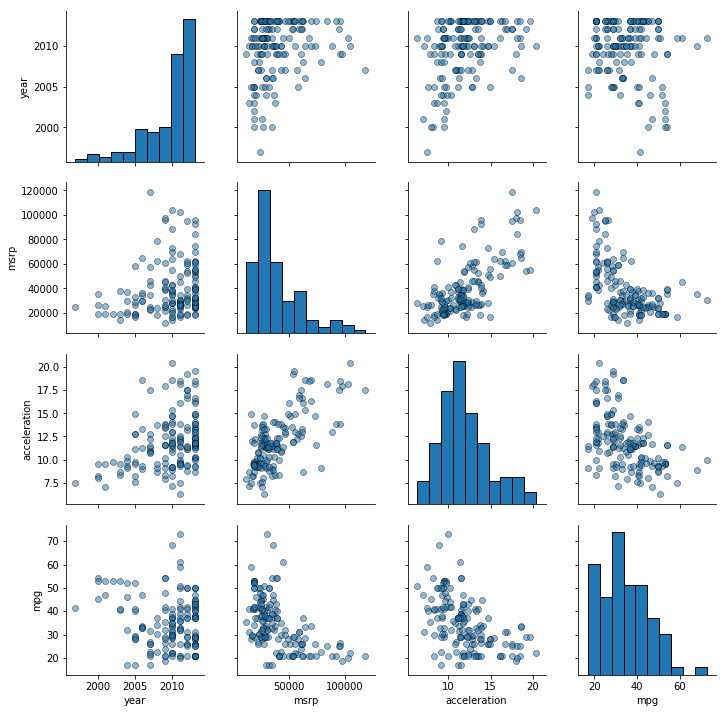

In [3]:
import seaborn as sns
sns.pairplot(df, diag_kws={'edgecolor':'k'}, plot_kws={'alpha':0.5, 'edgecolor':'k'})

Selecionamos apenas as colunas que serão utilizadas.

Normalizamos os dados para que o gradiente descendente rode sem problemas.

In [4]:
y = df['msrp']
X = df[['year','acceleration','mpg']]

X -= X.mean()
X /= X.std(ddof=1)
y -= y.mean()
y /= y.std(ddof=1)

X.insert(0, 'intercept', 1.0)

X = X.values
y = y.values

__IMPORTANTE:__
Não crie ou utilize qualquer variável ou função com nome iniciado por ``_teste_``.

A) Implemente a função de gradiente dos parâmetros da regressão, retornando um array com os valores dos gradientes para cada parâmetro theta.

In [5]:
def gradients(theta, X, y):
    # x : matriz nxm
    # y : array nx1
    # theta : array mx1
    # YOUR CODE HERE
    return -2 * ((y - X @ theta) * X.T).mean(axis=1)

B) Implemente a função de gradiente descendente para os parâmetros da regressão linear. 

Retorne uma lista com o valor de alpha e os valores de beta para cada coluna, nessa ordem.

In [6]:
def descent(theta0, X, y, learning_rate=0.005, tolerance=0.0000001):
    # YOUR CODE HERE
    theta = theta0.copy()
    old_err_sq = np.inf
    i = 0
    while True:
        grad = gradients(theta, X, y)
        theta_novo = theta - learning_rate * grad
        err_sq = ((X.dot(theta) - y) ** 2).mean()
        if np.abs(old_err_sq - err_sq) <= tolerance:
            break
        theta = theta_novo
        old_err_sq = err_sq
        i += 1
    return theta

theta = [1,1,1,1]
theta = descent(theta, X, y, learning_rate=0.005, tolerance=0.0000001)
theta

array([ 1.42911114e-05, -4.42831072e-02,  5.92701667e-01, -2.38011994e-01])

C) Agora vamos tentar avaliar o modelo de regressão linear obtido com o gradiente descendente.

Primeiro implementem uma função que calcule o valor da soma total dos quadrados (SST) a partir dos dados.

In [7]:
def sst(y):
    # YOUR CODE HERE
    y_mean = y.mean()
    r = (y - y_mean)**2
    sst_ = r.sum()
    return sst_

D) Para calcular a soma total de erros (SSE), primeiro precisamos ter uma previsão para os valores de
 preço dos apartamentos.
Implementem uma função que obtenha os valores estimativa de preço a partir dos demais atributos, de acordo com o modelo de regressão linear.

A função deve retornar uma lista com os valores previstos.

In [8]:
def predict(X, theta):
    # YOUR CODE HERE
    y = X @ theta
    return y

E) Agora implemente a função de cálculo da soma total de erros (SSE).

In [9]:
def sse(X, y, theta):
    # YOUR CODE HERE
    erros = (y - predict(X, theta))**2
    sse_ = erros.sum()
    return sse_

F) Finalmente, implemente a função que calcula o coeficiente de determinação (R2).

In [10]:
def r2(X, y, theta):
    # YOUR CODE HERE
    sst_ = sst(y)
    sse_ = sse(X, y, theta)
    r2_ = 1 - (sse_ / sst_)
    return r2_

r2(X, y, theta)

0.5288836396550896

G) Se observarmos os dados pelos gráficos gerados no começo do notebook, podemos perceber que nem todos possuem uma relação linear. Vamos tentar transformar os dados de um dos atributos dos carros, para que uma regressão linear possa ser aplicada com melhores resultados.

Tire o logaritmo dos dados do atributo ```mpg```, antes de z-normalizar.

In [11]:
y = df['msrp']
X = df[['year','acceleration','mpg']]

# YOUR CODE HERE
# fiz esse role todo porque o jeito mais simples tava dando um warning
log = np.log(X['mpg'].values)
X = X.drop('mpg', 1)
X.insert(2, 'mpg', log)

X -= X.mean()
X /= X.std(ddof=1)
y -= y.mean()
y /= y.std(ddof=1)

X.insert(0, 'intercept', 1.0)

X = X.values
y = y.values

new_theta = descent(theta, X, y, learning_rate=0.005, tolerance=0.0000001)
r2(X, y, new_theta)

0.5543678745234584

Note que o código do gradiente descendente pode ser executado sem alterações.

Verifique se o R2 da regressão melhorou ou piorou ao se transformar os dados.